# Análise Exploratória Título

### 0. Contexto

#### Texto

### 1. Manipulação

#### 1.1 Imports

In [299]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import openpyxl

#### 1.2 Coleta

In [300]:
dfClientes = pd.read_excel('caso_estudo.xlsx', sheet_name='clientes')
dfLojas = pd.read_excel('caso_estudo.xlsx', sheet_name='lojas')
dfPag = pd.read_excel('caso_estudo.xlsx', sheet_name='pagamentos')
dfProdutos = pd.read_excel('caso_estudo.xlsx', sheet_name='produtos')
dfVendas = pd.read_excel('caso_estudo.xlsx', sheet_name='vendas')

#### 1.3 Análise Preliminar

In [301]:
# Amostra da base dfClientes
dfClientes.sample(5)

,id,nome,sexo,dt_nasc
855,856,Amanda Cunha,F,6/14/1948
98,99,André Souza,M,1/24/1974
989,990,Julia Castro,F,9/12/1971
385,386,Beatriz Lima,F,4/25/1947
985,986,Alice Melo,F,8/2/1967


In [302]:
# Checando valores nulos
dfClientes.isnull().sum() 

id         0
nome       4
sexo       4
dt_nasc    4
dtype: int64

In [303]:
# Checando as linhas que contém esses valores nulos
dfClientes[dfClientes.isnull().T.any()]

,id,nome,sexo,dt_nasc
263,264,NaN,F,7/29/1997
264,265,NaN,M,2/7/1979
268,269,NaN,F,NaN
269,270,NaN,M,NaN
276,277,Brenda Santos,F,NaN
282,283,Amanda Barros,F,NaN
287,288,Victor Ribeiro,NaN,12/17/1974
290,291,Clara Pinto,NaN,12/25/1980
294,295,Tiago Lima,NaN,7/26/1973
301,302,Guilherme Cardoso,NaN,3/9/1998


In [304]:
dfProdutos

,id,produto,valor
0,1,mouse,20.0
1,2,teclado,30.0
2,3,laptop básico,2300.0
3,4,laptop gamer,5300.0
4,5,monitor,1500.0
5,6,impressora,700.0
6,7,carregador,150.0
7,8,cadeira,540.0
8,9,mesa,860.0
9,10,xxx-231a,3211352.0


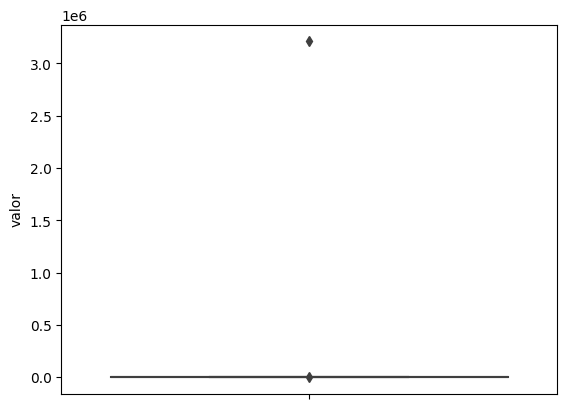

In [305]:
# Plotando Boxplot
sns.boxplot(data=dfProdutos, y='valor')
plt.show()

Há um valor muito fora da curva, e como vimos na base dos dados, está com um nome fora da realidade

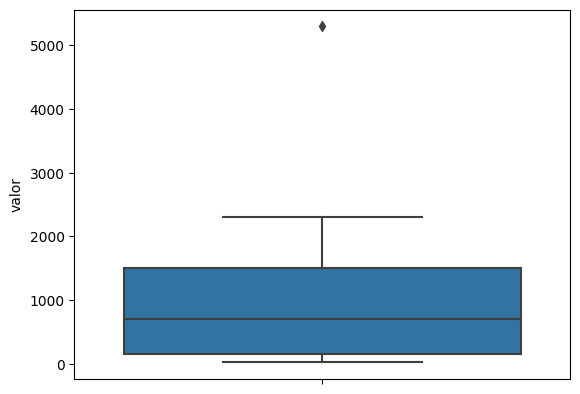

In [306]:
# Plotando Boxplot sem o outlier
filtro = dfProdutos[dfProdutos.valor < 3000000]
sns.boxplot(data=filtro, y='valor')
plt.show()

Agora sim, valores mais proximos da realidade, com o valor acima de 5000 sendo um valor não tão discrepante em relação ao resto

In [307]:
# Amostra da base dfVendas
dfVendas.sample(5)

,id,id_cliente,id_loja,id_produto,dt_venda
2850,2851,718,9,3,2020-08-06
190,191,147,2,6,2018-03-08
2957,2958,73,2,3,2020-09-14
1047,1048,668,8,3,2018-12-13
2205,2206,209,9,3,2020-01-14


In [308]:
# Checando valores nulos
dfVendas.isnull().sum()

id            0
id_cliente    0
id_loja       0
id_produto    0
dt_venda      0
dtype: int64

In [309]:
# Resumo da base
dfVendas.describe()

,id,id_cliente,id_loja,id_produto,dt_venda
count,3000.000000,3000.000000,3000.000000,3000.000000,3000
mean,1500.500000,500.763667,4.538333,4.435000,2019-05-17 17:48:28.799999744
min,1.000000,1.000000,1.000000,1.000000,2018-01-04 00:00:00
25%,750.750000,254.750000,2.000000,3.000000,2018-09-09 00:00:00
50%,1500.500000,503.500000,4.000000,3.000000,2019-05-20 00:00:00
75%,2250.250000,742.000000,7.000000,6.000000,2020-01-29 06:00:00
max,3000.000000,1000.000000,10.000000,10.000000,2020-09-27 00:00:00
std,866.169729,285.322282,2.922221,2.511018,NaN


Base limpa, sem valores problemáticos

In [310]:
# Amostra da base dfPag
dfPag.sample(5)

,id,id_venda,dt_pgto
1136,1137,1642,2019-07-19
583,584,851,2018-10-28
719,720,1050,2019-01-17
31,32,37,2018-02-24
1462,1463,2098,2019-12-13


In [311]:
# Checando valores nulos
dfPag.isnull().sum()

id          0
id_venda    0
dt_pgto     0
dtype: int64

In [312]:
dfPag.describe()

,id,id_venda,dt_pgto
count,2072.000000,2072.000000,2072
mean,1036.500000,1491.731660,2019-06-06 05:37:45.637065472
min,1.000000,1.000000,2018-01-10 00:00:00
25%,518.750000,746.250000,2018-10-01 12:00:00
50%,1036.500000,1501.500000,2019-06-10 00:00:00
75%,1554.250000,2220.500000,2020-02-08 00:00:00
max,2072.000000,2997.000000,2020-11-03 00:00:00
std,598.279199,864.865583,NaN


#### 1.4 Tratamento

In [313]:
# Tratando valores nulos
dfClientes.loc[dfClientes.nome.isnull(), 'nome'] = 'Sem Nome'
dfClientes.loc[dfClientes.sexo.isnull(), 'sexo'] = 'O'
dfClientes.loc[dfClientes.dt_nasc.isnull(), 'dt_nasc'] = '1/1/2020'

In [314]:
# Tratando Outliers
dfProdutos.loc[9, 'valor'] = dfProdutos.valor[9]/ 10000

Checando dados duplicados em todas as bases

In [315]:
dfClientes.drop('id', axis=1).duplicated().sum()

0

In [316]:
dfPag.drop('id', axis=1).duplicated().sum()

0

In [317]:
dfProdutos['produto'].duplicated().sum()

0

In [318]:
dfLojas['cidade'].duplicated().sum()

0

In [319]:
dfVendas.drop('id', axis=1).duplicated().sum()

1

In [320]:
# Verificando o dado duplicado da base dfVendas
dfVendas[dfVendas.drop('id', axis=1).duplicated()]

,id,id_cliente,id_loja,id_produto,dt_venda
496,497,559,2,5,2018-06-22


In [321]:
dfVendas.query('id_cliente == 559 & id_produto == 5')

,id,id_cliente,id_loja,id_produto,dt_venda
495,496,559,2,5,2018-06-22
496,497,559,2,5,2018-06-22


Existe dado duplicado, mas neste caso não é problematico

In [322]:
# Tratando o formato de data da base dfClientes
dfClientes['dt_nasc'] = pd.to_datetime(dfClientes['dt_nasc'], format= '%m/%d/%Y')

In [323]:
# Configurando index das bases
dfClientes.set_index('id', inplace=True)
dfProdutos.set_index('id', inplace=True)
dfLojas.set_index('id', inplace=True)
dfVendas.set_index('id', inplace=True)
dfPag.set_index('id', inplace=True)

#### 1.5 Fusão das Bases

In [324]:
# Mesclando as bases em uma só
df = dfVendas.join(dfClientes.add_prefix('cliente_'), on='id_cliente')
df = df.join(dfLojas.add_prefix('loja_'), on='id_loja')
df = df.join(dfProdutos.add_prefix('produto_'), on='id_produto')
df = df.join(dfPag.set_index('id_venda'))

Checando possíveis erros

In [325]:
df.isnull().sum()

id_cliente           0
id_loja              0
id_produto           0
dt_venda             0
cliente_nome         0
cliente_sexo         0
cliente_dt_nasc      0
loja_cidade          0
produto_produto      0
produto_valor        0
dt_pgto            928
dtype: int64

Muitos pagamentos em falta. Trataremos a seguir...

#### 1.6 Feature  Engineering

In [353]:
# Adicionando a coluna "Pagamento"
# Se for 1, foi pago, se for 0, não foi pago
df['pgto'] = 1
df.loc[df.dt_pgto.isnull(), 'pgto'] = 0
df

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,loja_cidade,produto_produto,produto_valor,dt_pgto,pgto,tempo_pgto,cliente_idade,venda_ano,promoção
id,,,,,,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0,2018-01-24,1,20.0,73.0,2018,0
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0,2018-02-17,1,44.0,51.0,2018,1
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0,2018-02-14,1,41.0,61.0,2018,1
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0,NaT,0,NaN,82.0,2018,0
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0,2018-01-23,1,18.0,82.0,2018,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31,Curitiba,carregador,150.0,2020-10-17,1,20.0,24.0,2020,0
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29,Brasília,laptop básico,2300.0,2020-10-02,1,5.0,29.0,2020,0
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04,Rio de Janeiro,laptop gamer,5300.0,NaT,0,NaN,37.0,2020,0


In [327]:
# Adicionando a coluna "tempo_pgto"
# Intervalo de tempo entre a venda e o pagamento
df['tempo_pgto'] = (df['dt_pgto'] - df['dt_venda']).dt.days

In [328]:
# Adicionando a coluna "cliente_idade"
df['cliente_idade'] = np.floor( (pd.to_datetime('today') - df['cliente_dt_nasc']) / np.timedelta64(1, 'Y')) 

### 2. Análise : Vendas e Receitas

#### 2.1 Lojas que Mais Vendem

In [329]:
# Calculando dados que serão usados
calculo = df.groupby('loja_cidade')['produto_valor'].count().sort_values(ascending=False)

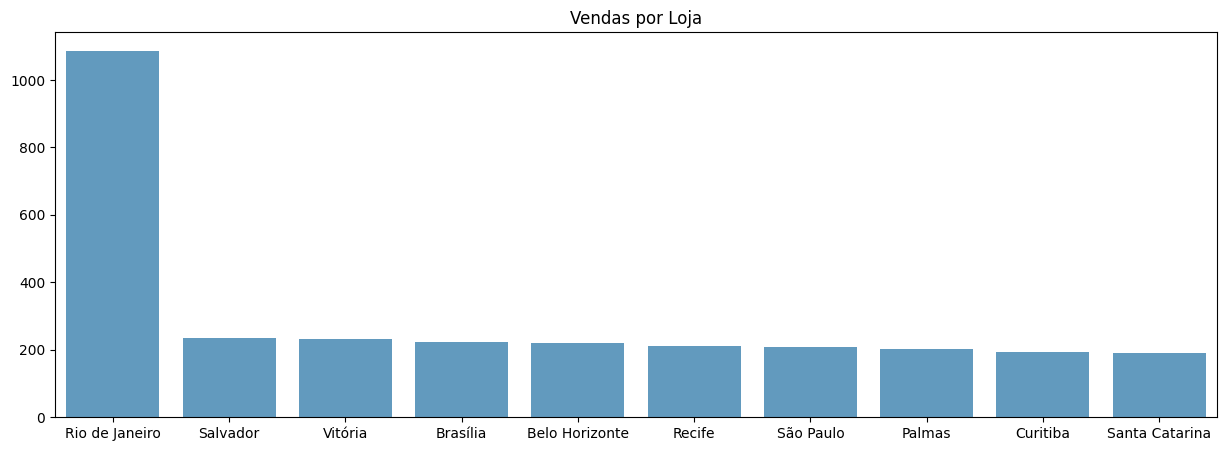

In [330]:
# Plotando grafico de Barra

plt.figure(figsize=(15,5))
cor = sns.color_palette('Blues')[3]
grafico = sns.barplot(x=calculo.index, y=calculo.values, color=cor)
grafico.set(title='Vendas por Loja', xlabel='', ylabel='')
plt.show()

- Rio de Janeiro disparadamente é a loja que mais vende

#### 2.2 Produtos Mais Vendidos

In [331]:
calculo = df.groupby('produto_produto')['produto_valor'].count().sort_values(ascending=False)

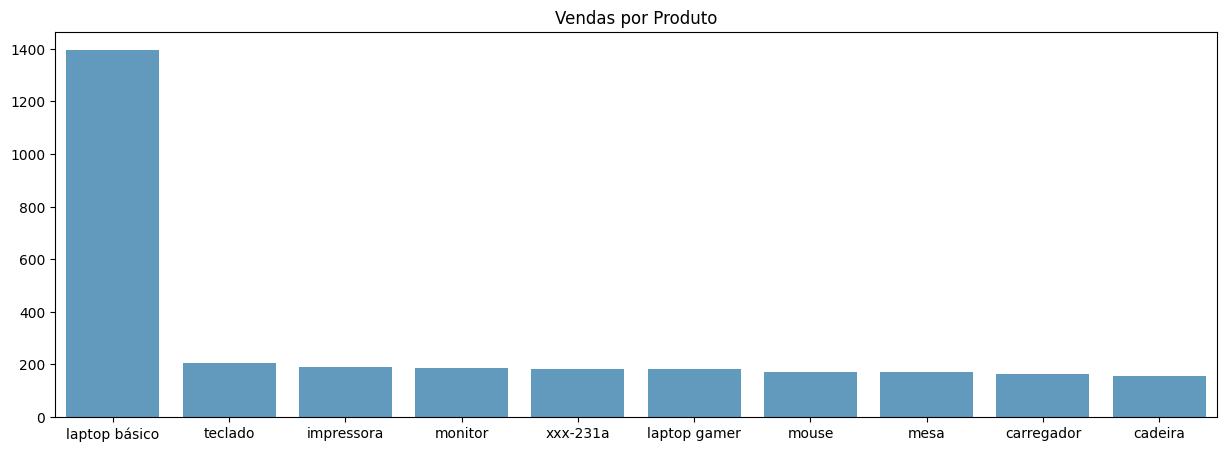

In [332]:
plt.figure(figsize=(15,5))
cor = sns.color_palette('Blues')[3]
grafico = sns.barplot(x=calculo.index, y=calculo.values, color=cor)
grafico.set(title='Vendas por Produto', xlabel='', ylabel='')
plt.show()

- Laptop básico também se destaca como o produto mais vendido

#### 2.3 Receita por Loja

In [333]:
calculo = df[['loja_cidade','produto_valor']].groupby('loja_cidade').sum().produto_valor.sort_values(ascending=False)

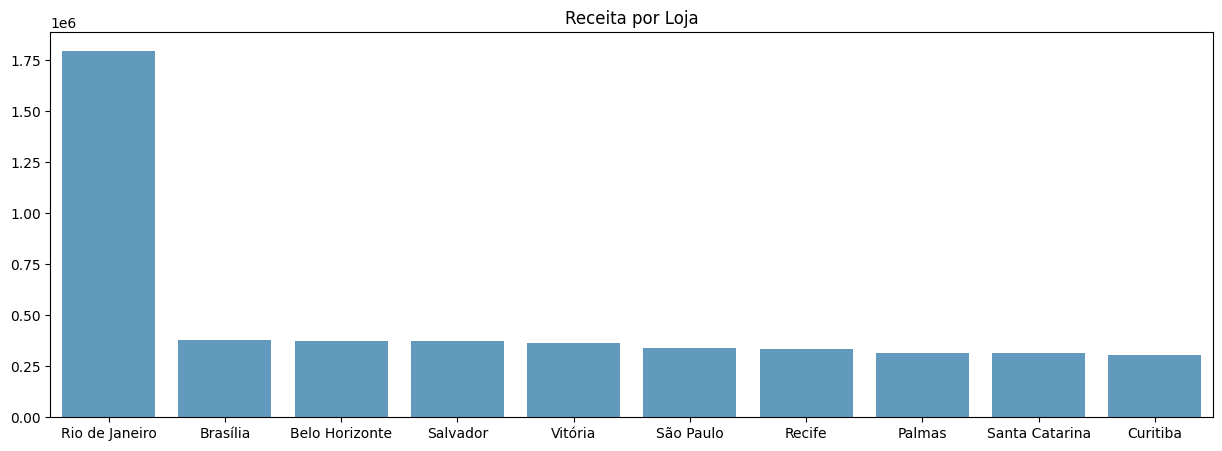

In [334]:
plt.figure(figsize=(15,5))
cor = sns.color_palette('Blues')[3]
grafico = sns.barplot(x=calculo.index, y=calculo.values, color=cor)
grafico.set(title='Receita por Loja', xlabel='', ylabel='')
plt.show()

- Assim como na parte de vendas, Rio de Janeiro se destaca com maior receita
- Com exceção do Rio de Janeiro, as outras lojas estão parelhas 

In [335]:
calculo1 = calculo.max()/ calculo[calculo != calculo.max()].mean() 

print(f'O maior valor é {calculo.max().round()}, sendo {calculo1.round(2)} vezes a média dos demais, que é {calculo[calculo != calculo.max()].mean().round()}')

O maior valor é 1797907.0, sendo 5.22 vezes a média dos demais, que é 344624.0


#### 2.4 Receita por Produto

In [336]:
calculo = df[['produto_produto', 'produto_valor']].groupby('produto_produto').sum().produto_valor.sort_values(ascending=False)

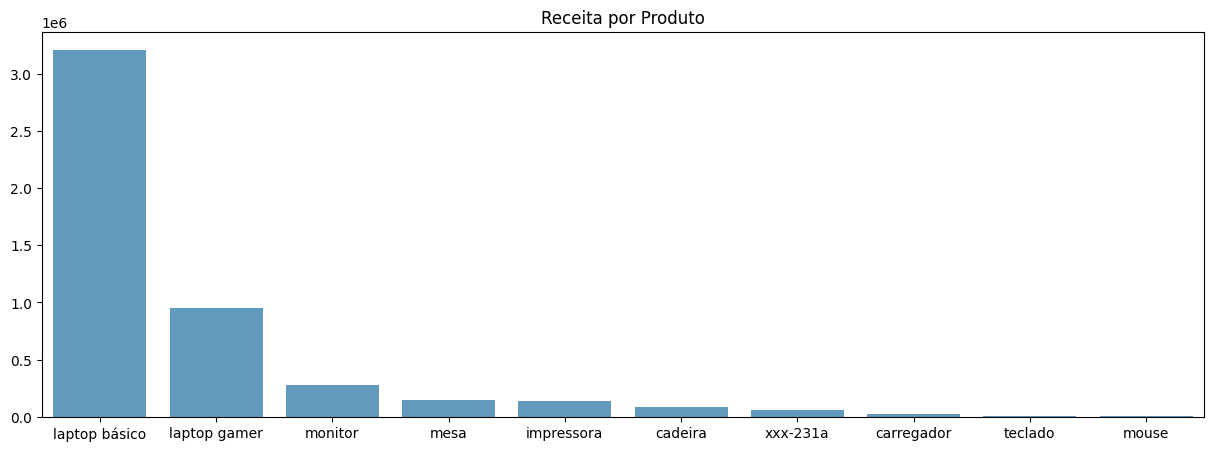

In [337]:
plt.figure(figsize=(15,5))
cor = sns.color_palette('Blues')[3]
grafico = sns.barplot(x=calculo.index, y=calculo.values, color=cor)
grafico.set(title='Receita por Produto', xlabel='', ylabel='')
plt.show()

- Laptop Básico se destaca na receita com uma grande diferença dos demais
- Com exceção do Laptop Básico, o Laptop Gamer tem uma diferença considerável dos demais abaixo

#### 2.5 Paretto de Receita por Produto

In [338]:
calculo = df[['produto_produto', 'produto_valor']].groupby('produto_produto').sum().produto_valor.sort_values(ascending=False)

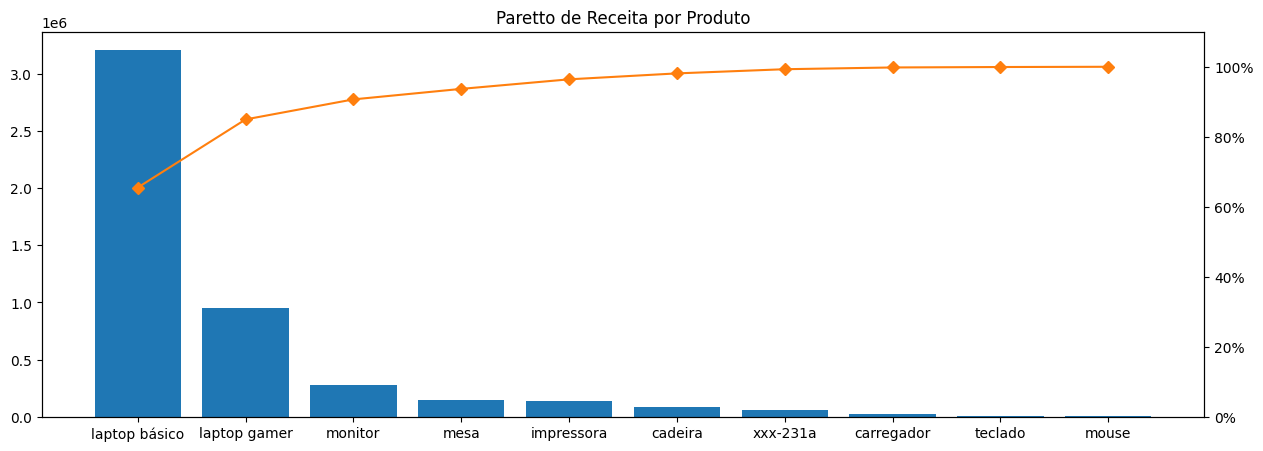

In [339]:
fig, ax= plt.subplots(figsize=(15,5))
ax.bar(calculo.index, calculo.values, color='C0')
ax2= ax.twinx()
ax2.plot(calculo.index, calculo.values.cumsum()/calculo.values.sum()*100, color='C1', marker='D')
ax2.yaxis.set_major_formatter(PercentFormatter())
plt.ylim(0,110)
plt.title('Paretto de Receita por Produto')
plt.show()

- Percebe-se que o Laptop Básico e o Laptop Gamer representam 90% da receita

### 3. Análise : Tempo

#### 3.1 Tempo de Pagamento em Boxplot

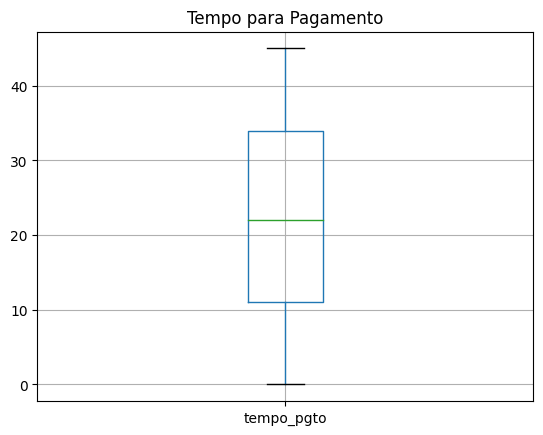

In [340]:
df.boxplot('tempo_pgto')
plt.title('Tempo para Pagamento')
plt.show()

#### 3.2 Histograma do Tempo de Pagamento

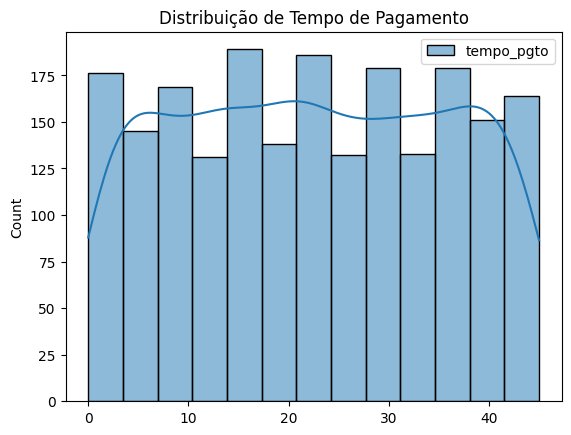

In [341]:
sns.histplot(data=df[['tempo_pgto']], kde=True)
plt.title('Distribuição de Tempo de Pagamento')
plt.show()

In [342]:
df.tempo_pgto.describe()

count    2072.000000
mean       22.472008
std        13.256384
min         0.000000
25%        11.000000
50%        22.000000
75%        34.000000
max        45.000000
Name: tempo_pgto, dtype: float64

- Não existe previsibilidade na média do tempo de pagamento

#### 3.3 Tempo de Pagamento por Cidade e Produto

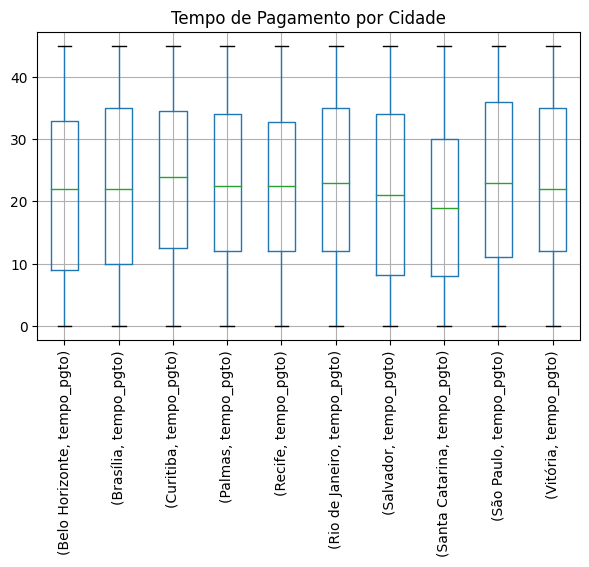

In [343]:
plt.figure(figsize=(7,4))
df[['loja_cidade', 'tempo_pgto']].groupby('loja_cidade').boxplot('tempo_pgto')
plt.xticks(rotation=90)
plt.title('Tempo de Pagamento por Cidade')
plt.show()

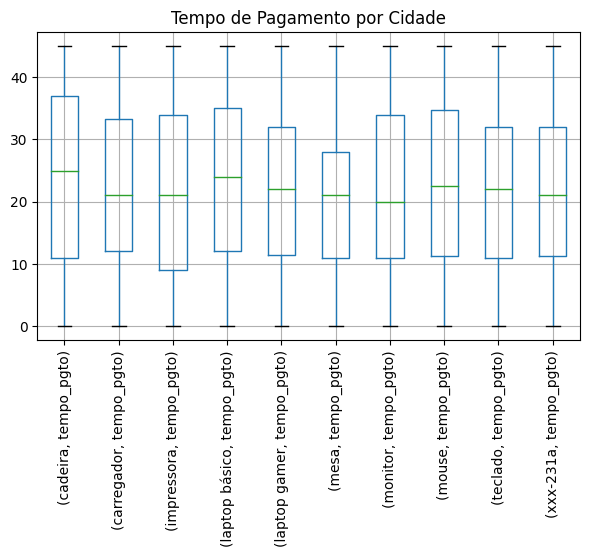

In [344]:
plt.figure(figsize=(7,4))
df[['produto_produto', 'tempo_pgto']].groupby('produto_produto').boxplot('tempo_pgto')
plt.xticks(rotation=90)
plt.title('Tempo de Pagamento por Cidade')
plt.show()

- Baixa variação entre os dados em ambos gráficos
- A mesa está um pouco abaixo dos demais, mas nada muito significativo

#### 3.4 Sazonalidade

Média Móvel da Receita

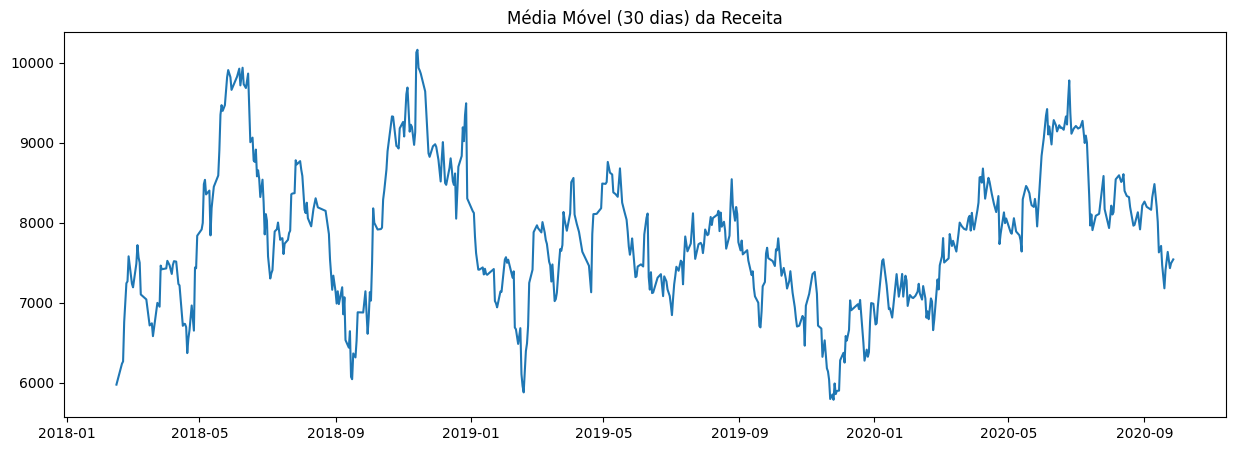

In [345]:
calculo = df[['produto_valor', 'dt_venda']].groupby('dt_venda').sum().rolling(30).mean()

plt.figure(figsize=(15,5))
plt.plot(calculo.index, calculo.values)
plt.title('Média Móvel (30 dias) da Receita')
plt.show()

Tendência de Receita por Ano

In [346]:
df['venda_ano'] = pd.DatetimeIndex(df.dt_venda).year

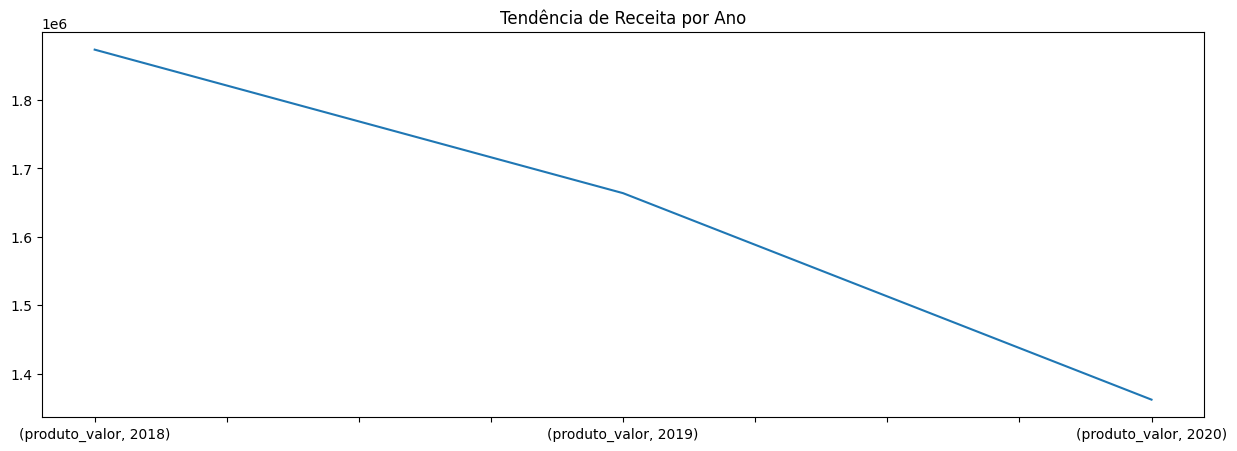

In [347]:
fig, ax= plt.subplots(figsize=(15,5))
grafico = df[['produto_valor', 'venda_ano']].groupby('venda_ano').sum().unstack().plot(ax=ax)
grafico.set(title='Tendência de Receita por Ano', xlabel='', ylabel='')
plt.show()

#### 3.5 Tempo Médio de Pagamento por Promoção

Aqui vamos de última hora, trazer uma base nova para o nosso Dataframe 

In [348]:
# Lendo Arquivo
dfPromo = pd.read_csv('caso_estudo_venda_promocao.csv', sep=';')
# Definindo index
dfPromo = dfPromo.set_index('id_venda')
# Juntando dfPromo para nosso dataframe
df = df.join(dfPromo)
print(df)

      id_cliente  id_loja  id_produto   dt_venda     cliente_nome  \
id                                                                  
1            393        9           3 2018-01-04    Gustavo Silva   
2            417        9           3 2018-01-04   Leonor Almeida   
3            374        7           8 2018-01-04      André Alves   
4             59        4           3 2018-01-05  Rodrigo Ribeiro   
5             18        9           1 2018-01-05  Antônio Azevedo   
...          ...      ...         ...        ...              ...   
2996         671        3           7 2020-09-27    Ana Goncalves   
2997         586        8           3 2020-09-27      Aline Pinto   
2998         731        2           4 2020-09-27     Otávio Silva   
2999         163        2           1 2020-09-27      Ana Pereira   
3000         770        2           2 2020-09-27  Beatrice Castro   

     cliente_sexo cliente_dt_nasc     loja_cidade produto_produto  \
id                               

In [354]:
df

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,loja_cidade,produto_produto,produto_valor,dt_pgto,pgto,tempo_pgto,cliente_idade,venda_ano,promoção
id,,,,,,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0,2018-01-24,1,20.0,73.0,2018,0
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0,2018-02-17,1,44.0,51.0,2018,1
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0,2018-02-14,1,41.0,61.0,2018,1
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0,NaT,0,NaN,82.0,2018,0
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0,2018-01-23,1,18.0,82.0,2018,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31,Curitiba,carregador,150.0,2020-10-17,1,20.0,24.0,2020,0
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29,Brasília,laptop básico,2300.0,2020-10-02,1,5.0,29.0,2020,0
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04,Rio de Janeiro,laptop gamer,5300.0,NaT,0,NaN,37.0,2020,0


Comparação de Tempo de Pagamento em Promoção

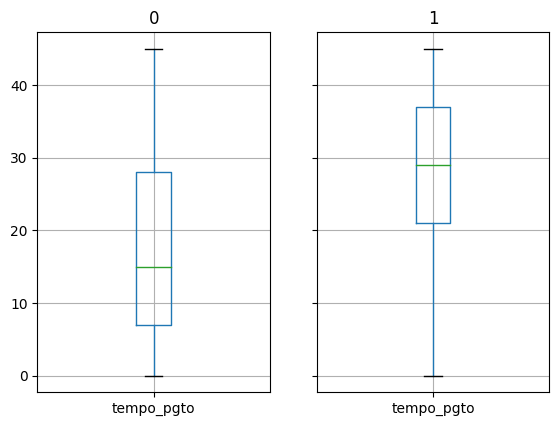

In [349]:
calculo = df[['promoção','tempo_pgto']][~df.tempo_pgto.isnull()]
calculo.groupby('promoção').boxplot(column=['tempo_pgto'])
plt.show()

- Quando temos promoção, o tempo de pagamento tende a se deslocar, porém, mantendo os limites superiores e inferiores

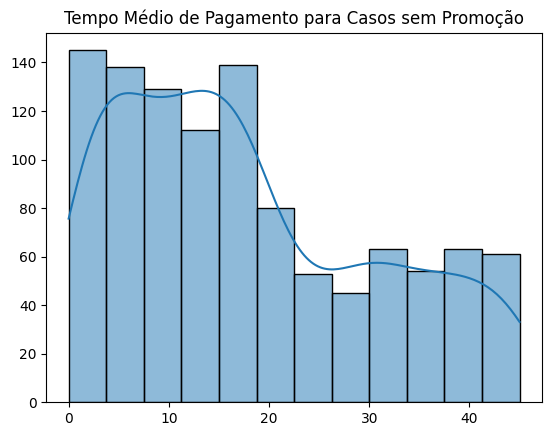

In [350]:
grafico = sns.histplot(data=calculo.tempo_pgto[calculo['promoção']==0], kde=True)
grafico.set(title='Tempo Médio de Pagamento para Casos sem Promoção', xlabel='', ylabel='')
plt.show()

- Em casos sem promoção, o tempo médio de pagamento possuem maior chance de serem abaixo dos 20 dias

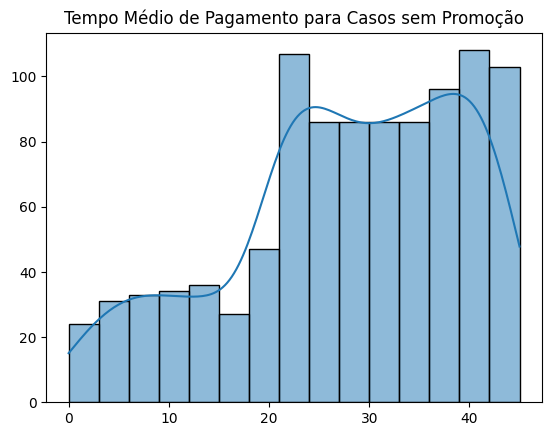

In [351]:
grafico = sns.histplot(data=calculo.tempo_pgto[calculo['promoção']==1], kde=True)
grafico.set(title='Tempo Médio de Pagamento para Casos sem Promoção', xlabel='', ylabel='')
plt.show()

- Já em casos com promoção, o tempo médio de pagamento têm chances maiores de serem acima dos 20 dias

### 4. Análise : Inadimplência


#### 4.1 Inadimplência por Loja

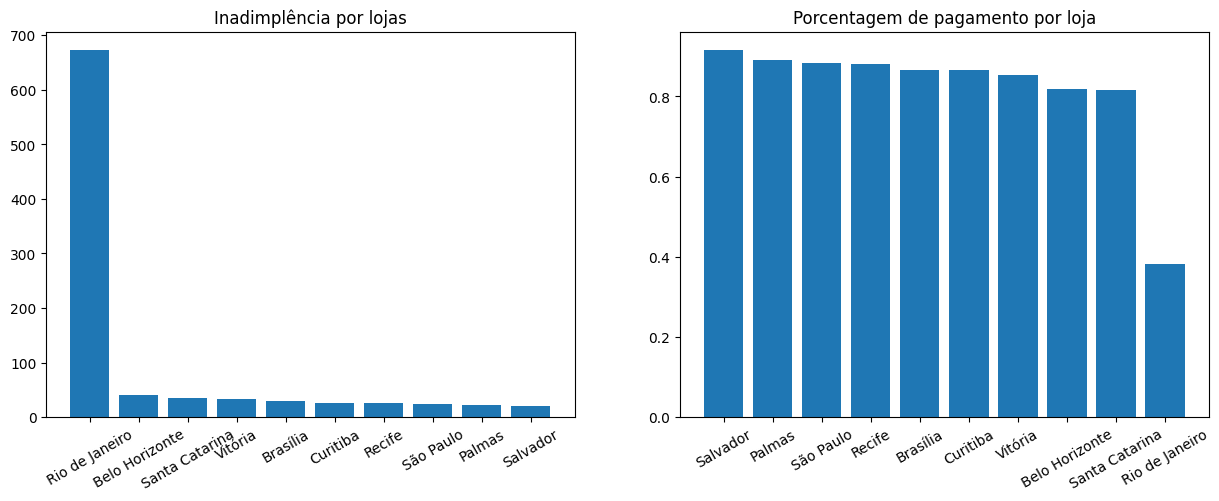

In [366]:
plt.figure(figsize=(15,5))

# Primeiro gráfico 
plt.subplot(1,2,1)
calculo = df[df.pgto==0].groupby('loja_cidade').count().produto_valor.sort_values(ascending=False)
plt.bar(calculo.index, calculo.values)
plt.title('Inadimplência por lojas')
plt.xticks(rotation=30)

# Segundo Gráfico
plt.subplot(1,2,2)
calculo = df.groupby('loja_cidade').pgto.mean().sort_values(ascending=False)
plt.bar(calculo.index, calculo.values)
plt.title('Porcentagem de pagamento por loja')
plt.xticks(rotation=30)

plt.show()

- Rio de Janeiro se destaca disparadamente com maior numero de inadimplências
- Além do Rio de Janeiro, Belo Horizonte e Santa Catarina são duas das lojas com menor porcentagem de pagamentos

#### 4.2 Inadimplência por Produto

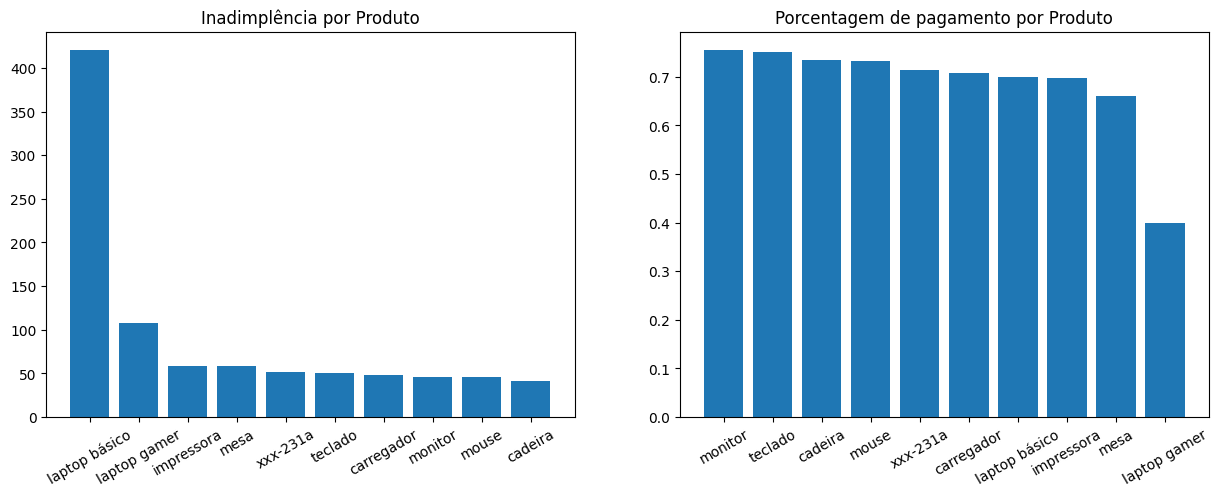

In [375]:
plt.figure(figsize=(15,5))

# Primeiro gráfico
plt.subplot(1,2,1)
calculo = df[df.pgto==0].groupby('produto_produto').count().pgto.sort_values(ascending=False)
plt.bar(calculo.index, calculo.values)
plt.title('Inadimplência por Produto')
plt.xticks(rotation=30)

# Segundo Gráfico
plt.subplot(1,2,2)
calculo = df.groupby('produto_produto').pgto.mean().sort_values(ascending=False)
plt.bar(calculo.index, calculo.values)
plt.title('Porcentagem de pagamento por Produto')
plt.xticks(rotation=30)

plt.show()

- Laptop Básico tem o maior numero de inadimplência
- Baixa porcentagem de pagamento do Laptop Gamer

#### 4.3 Inadimplência por Receita

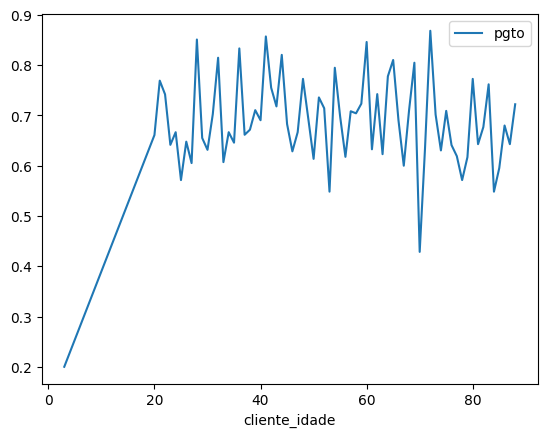

In [377]:
calculo = df[['cliente_idade', 'pgto']].groupby('cliente_idade').mean().sort_values('cliente_idade')
calculo.plot()
plt.show()

In [380]:
df.query('cliente_idade < 20')

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,loja_cidade,produto_produto,produto_valor,dt_pgto,pgto,tempo_pgto,cliente_idade,venda_ano,promoção
id,,,,,,,,,,,,,,,,
21,270,2,10,2018-01-12,Sem Nome,M,2020-01-01,Rio de Janeiro,xxx-231a,321.1352,NaT,0,NaN,3.0,2018,0
1059,269,5,4,2018-12-15,Sem Nome,F,2020-01-01,Santa Catarina,laptop gamer,5300.0000,NaT,0,NaN,3.0,2018,0
1745,269,9,3,2019-08-03,Sem Nome,F,2020-01-01,Palmas,laptop básico,2300.0000,2019-09-03,1,31.0,3.0,2019,1
1900,269,2,3,2019-09-22,Sem Nome,F,2020-01-01,Rio de Janeiro,laptop básico,2300.0000,NaT,0,NaN,3.0,2019,0
2370,277,10,3,2020-03-09,Brenda Santos,F,2020-01-01,Vitória,laptop básico,2300.0000,NaT,0,NaN,3.0,2020,0


- Baixo impacto da idade na inadimplência
- Clientes com cadastro incompleto, podem ter maior inadimplência.